# Heart Disease Prediction

## Problem Statement
The goal of this project is to predict whether a patient is likely to have heart disease based on medical attributes such as age, cholesterol levels, chest pain type, and others.

We apply machine learning classification techniques to:
- Preprocess and explore the dataset
- Train a Logistic Regression model
- Evaluate model performance using accuracy, confusion matrix, and ROC-AUC
- Identify the most important features influencing predictions


In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

## Dataset Loading and Preprocessing

We begin by loading the dataset.


In [51]:
# Loading Data
data = pd.read_csv("HeartDiseaseTrain-Test.csv")
data

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


## Data Visualization and Exploration

We explore the data by checking for missing values, encoding categorical features, and detecting outliers in numerical data and we found the feature relationships using a correlation matrix to understand which variables are most associated with the target variable.



In [52]:
# Checking column types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [53]:
# Checking for number of missing values in data
data.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [54]:
# Defining the categorical features
categorical_cols = [
    'sex',
    'chest_pain_type',
    'fasting_blood_sugar',
    'rest_ecg',
    'exercise_induced_angina',
    'slope',
    'vessels_colored_by_flourosopy',
    'thalassemia'
]

# Assigning values to these features
for col in categorical_cols:
    print(f"\n=== {col} ===")
    print(data[col].value_counts())


=== sex ===
sex
Male      713
Female    312
Name: count, dtype: int64

=== chest_pain_type ===
chest_pain_type
Typical angina      497
Non-anginal pain    284
Atypical angina     167
Asymptomatic         77
Name: count, dtype: int64

=== fasting_blood_sugar ===
fasting_blood_sugar
Lower than 120 mg/ml      872
Greater than 120 mg/ml    153
Name: count, dtype: int64

=== rest_ecg ===
rest_ecg
ST-T wave abnormality           513
Normal                          497
Left ventricular hypertrophy     15
Name: count, dtype: int64

=== exercise_induced_angina ===
exercise_induced_angina
No     680
Yes    345
Name: count, dtype: int64

=== slope ===
slope
Flat           482
Downsloping    469
Upsloping       74
Name: count, dtype: int64

=== vessels_colored_by_flourosopy ===
vessels_colored_by_flourosopy
Zero     578
One      226
Two      134
Three     69
Four      18
Name: count, dtype: int64

=== thalassemia ===
thalassemia
Fixed Defect         544
Reversable Defect    410
Normal            

In [55]:
# Defining Numerical Features
numerical_cols = [
    'age',
    'resting_blood_pressure',
    'cholestoral',
    'Max_heart_rate',
    'oldpeak'
]

# Detecting the outliers
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return outliers

for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")

age: 0 outliers
resting_blood_pressure: 30 outliers
cholestoral: 16 outliers
Max_heart_rate: 4 outliers
oldpeak: 7 outliers


In [56]:
# Encoding Categorical Features using LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

data


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,3,125,212,1,2,168,0,1.0,0,3,3,0
1,53,1,3,140,203,0,1,155,1,3.1,2,4,3,0
2,70,1,3,145,174,1,2,125,1,2.6,2,4,3,0
3,61,1,3,148,203,1,2,161,0,0.0,0,1,3,0
4,62,0,3,138,294,0,2,106,0,1.9,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,1,2,164,1,0.0,0,4,0,1
1021,60,1,3,125,258,1,1,141,1,2.8,1,1,3,0
1022,47,1,3,110,275,1,1,118,1,1.0,1,1,0,0
1023,50,0,3,110,254,1,1,159,0,0.0,0,4,0,1


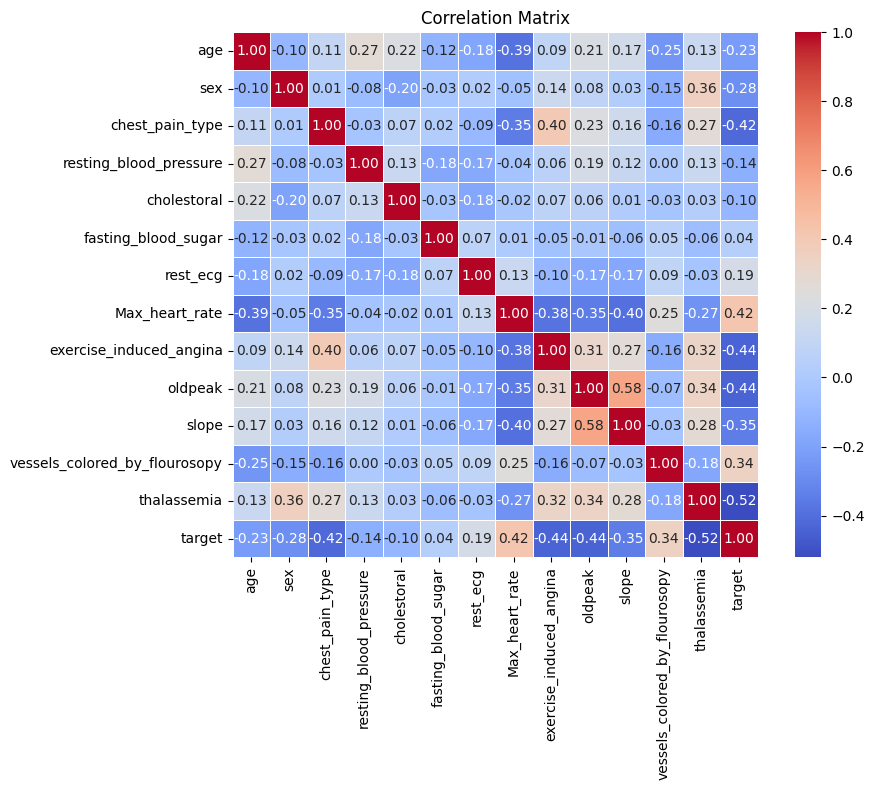

In [57]:
# Making Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

## Model Training and Evaluation

We train a Logistic Regression classifier and evaluate its performance using:
- Accuracy score
- Confusion matrix
- ROC curve and AUC


In [58]:
# Seperating Features and Targets
x = data.drop("target", axis=1)
y = data["target"]

# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [59]:
# Traning and Making Predictions by Logistic Regression Model 
Log_Regression=LogisticRegression(max_iter=1000)
Log_Regression.fit(x_train,y_train)
Log_Regression_predictions=Log_Regression.predict(x_test)

In [ ]:
# Dec_Tree=DecisionTreeClassifier(random_state=42)
# Dec_Tree.fit(x_train,y_train)
# Dec_Tree_prediction=Dec_Tree.predict(x_test)

In [ ]:
# Calculating Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, Log_Regression_predictions))
# print("Decision Tree Accuracy:", accuracy_score(y_test, Dec_Tree_prediction))



Logistic Regression Accuracy: 0.7902439024390244
Decision Tree Accuracy: 0.9853658536585366


**Although Decision Tree is giving better accuracy but reason for not choosing it was that it may be overfitting.**

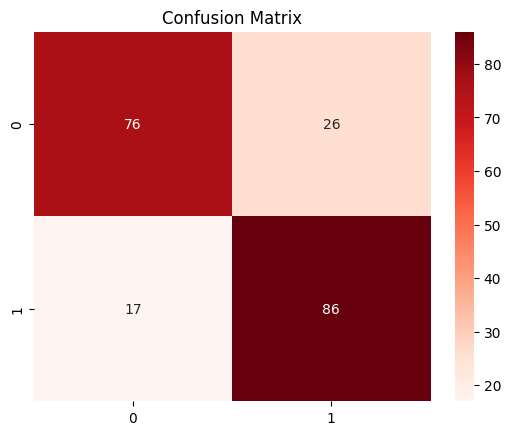

In [62]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, Log_Regression_predictions), annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix")
plt.show()

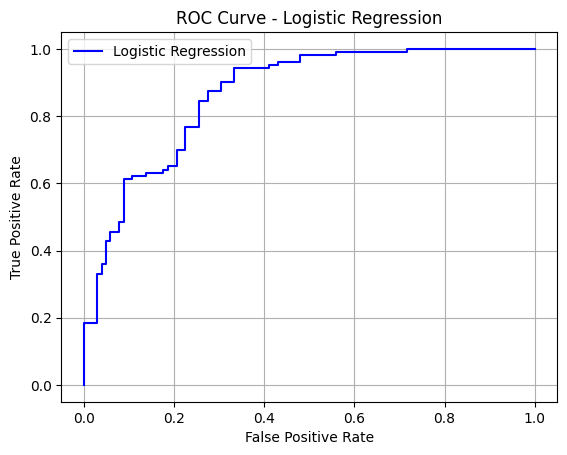

Logistic Regression ROC AUC: 0.8654102417666095


In [63]:
# ROC Curve
Log_Regression_probability = Log_Regression.predict_proba(x_test)[:, 1]

Log_Regression_fpr, Log_Regression_tpr, _ = roc_curve(y_test, Log_Regression_probability)

plt.plot(Log_Regression_fpr, Log_Regression_tpr, label="Logistic Regression", color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

# Getting AUC Score
print("Logistic Regression ROC AUC:", roc_auc_score(y_test, Log_Regression_probability))

## Explanation of Results and Final Insights

- **Accuracy** shows the percentage of correct predictions.
- **Confusion Matrix** gives insight into false positives/negatives.
- **ROC-AUC Score** reflects how well the model distinguishes between classes.
- **Feature importance (coefficients)** identifies the most influential features in predicting heart disease.


In [64]:
# Feature importance based on Logistic Regression coefficients
Train_features = x_train.columns
Coefficients = Log_Regression.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': Train_features,
    'Coefficient': Coefficients,
    'Importance (abs)': np.abs(Coefficients)
}).sort_values(by='Importance (abs)', ascending=False)

feature_importance

,Feature,Coefficient,Importance (abs)
1,sex,-1.239784,1.239784
8,exercise_induced_angina,-0.750067,0.750067
2,chest_pain_type,-0.735467,0.735467
9,oldpeak,-0.659493,0.659493
11,vessels_colored_by_flourosopy,0.540463,0.540463
12,thalassemia,-0.507558,0.507558
10,slope,-0.322475,0.322475
6,rest_ecg,0.275256,0.275256
5,fasting_blood_sugar,-0.149014,0.149014
7,Max_heart_rate,0.020693,0.020693
